# DATA ROLES IN TECH (SALARY) 





## 1.1. Libraries and data

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Salario Data Scientist/salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


## 1.2. Exploratory data Analysis

In [ ]:
# result using Tableau and Tableau Prep

In [ ]:
# tableau Prep
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Salario Data Scientist/Salida.csv',sep=';')
columna = data.pop('salary_in_usd')
data.insert(len(data.columns), 'salary_in_usd', columna)

data.head()


,experience_level,job_title,remote_ratio,company_size,salary_in_usd
0,MI,Machine Learning Engineer,0,M,130000
1,MI,Machine Learning Engineer,0,M,90000
2,MI,Data Scientist,100,M,120000
3,MI,Data Scientist,100,M,100000
4,MI,Data Scientist,100,M,85000


### 1.2.1. Error correction


In [ ]:
print(data.dtypes)

experience_level    object
job_title           object
remote_ratio         int64
company_size        object
salary_in_usd        int64
dtype: object


In [ ]:
data['remote_ratio'] = data['remote_ratio'].astype(object)

In [ ]:
print(data.isna().sum().sum().sum().sum().sum() > 0)

False


In [ ]:
freq_rel_A = data['experience_level'].value_counts(normalize=True)
freq_rel_B = data['job_title'].value_counts(normalize=True)
freq_rel_C = data['remote_ratio'].value_counts(normalize=True)
freq_rel_D = data['company_size'].value_counts(normalize=True)

print(freq_rel_A)
print(freq_rel_B)
print(freq_rel_C)
print(freq_rel_D)


SE    0.790875
MI    0.133080
EN    0.048162
EX    0.027883
Name: experience_level, dtype: float64
Data Scientist               0.311787
Data Engineer                0.295311
Data Analyst                 0.179975
Machine Learning Engineer    0.092522
Analytics Engineer           0.044360
Data Architect               0.044360
Data Science Manager         0.031686
Name: job_title, dtype: float64
100    0.615970
0      0.365019
50     0.019011
Name: remote_ratio, dtype: float64
M    0.799747
L    0.172370
S    0.027883
Name: company_size, dtype: float64


In [ ]:
summary = data.describe(include='all')
summary['dtype'] = data.dtypes
print(summary)

       experience_level       job_title  remote_ratio company_size  \
count               789             789         789.0          789   
unique                4               7           3.0            3   
top                  SE  Data Scientist         100.0            M   
freq                624             246         486.0          631   
mean                NaN             NaN           NaN          NaN   
std                 NaN             NaN           NaN          NaN   
min                 NaN             NaN           NaN          NaN   
25%                 NaN             NaN           NaN          NaN   
50%                 NaN             NaN           NaN          NaN   
75%                 NaN             NaN           NaN          NaN   
max                 NaN             NaN           NaN          NaN   

        salary_in_usd dtype  
count      789.000000   NaN  
unique            NaN   NaN  
top               NaN   NaN  
freq              NaN   NaN  
mean    1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


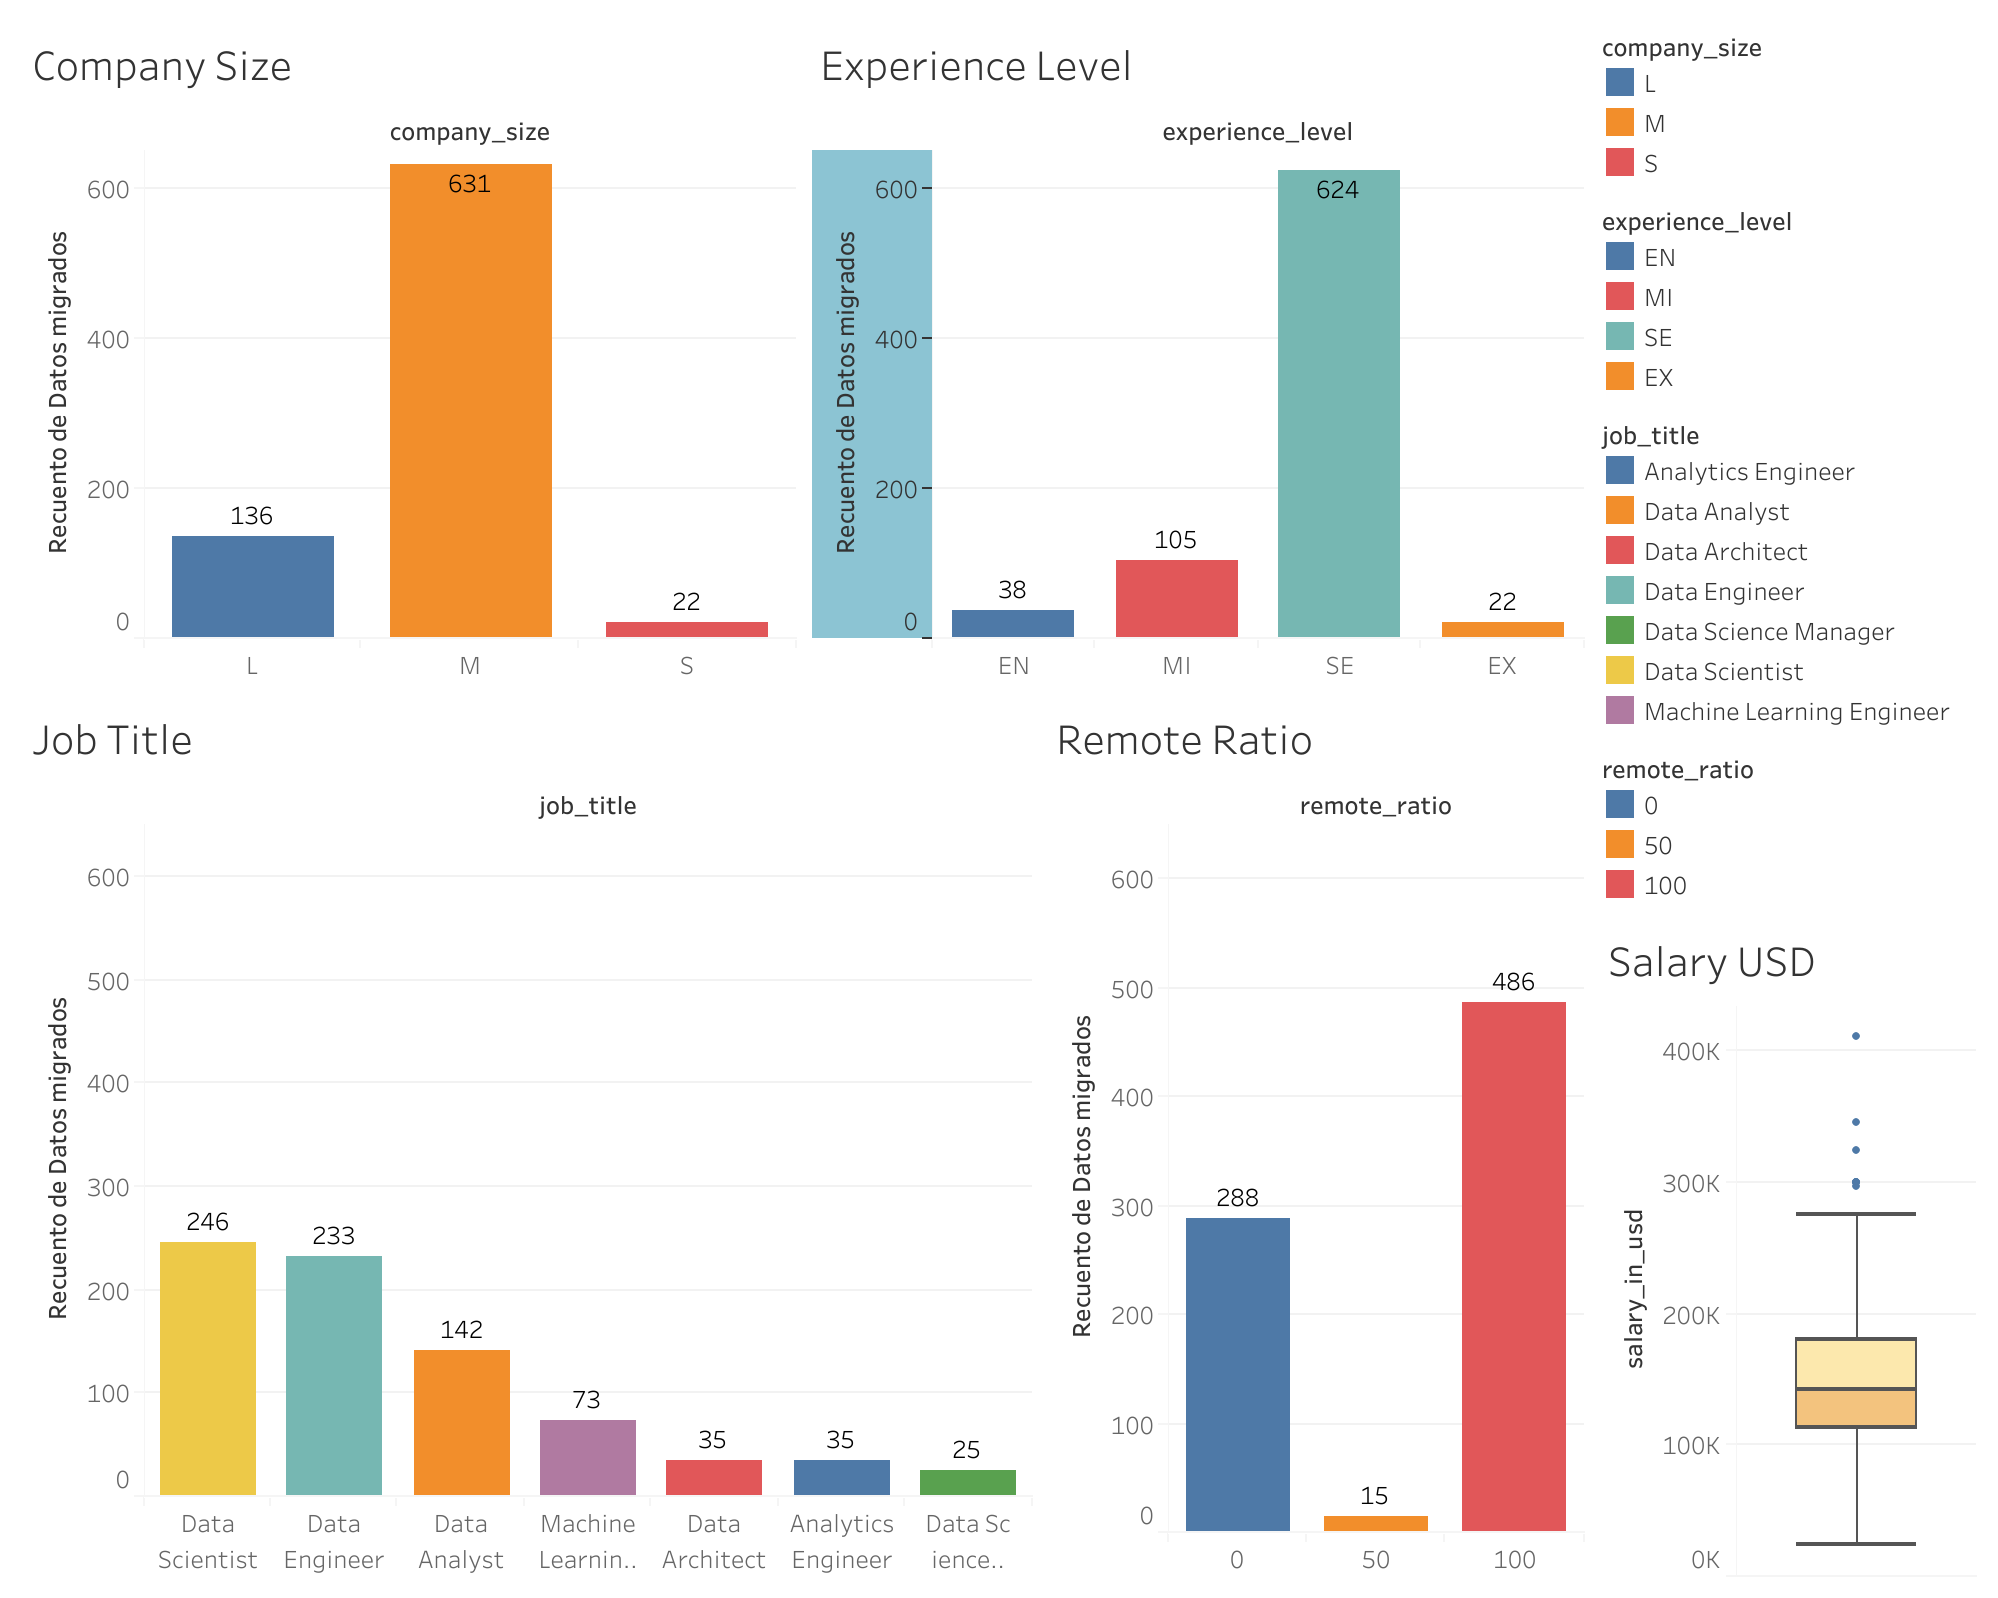

In [ ]:
# Tableau
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive')

imagen1=Image(filename='/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Salario Data Scientist/Dashboard 1.png')
imagen1 #univariate analysis




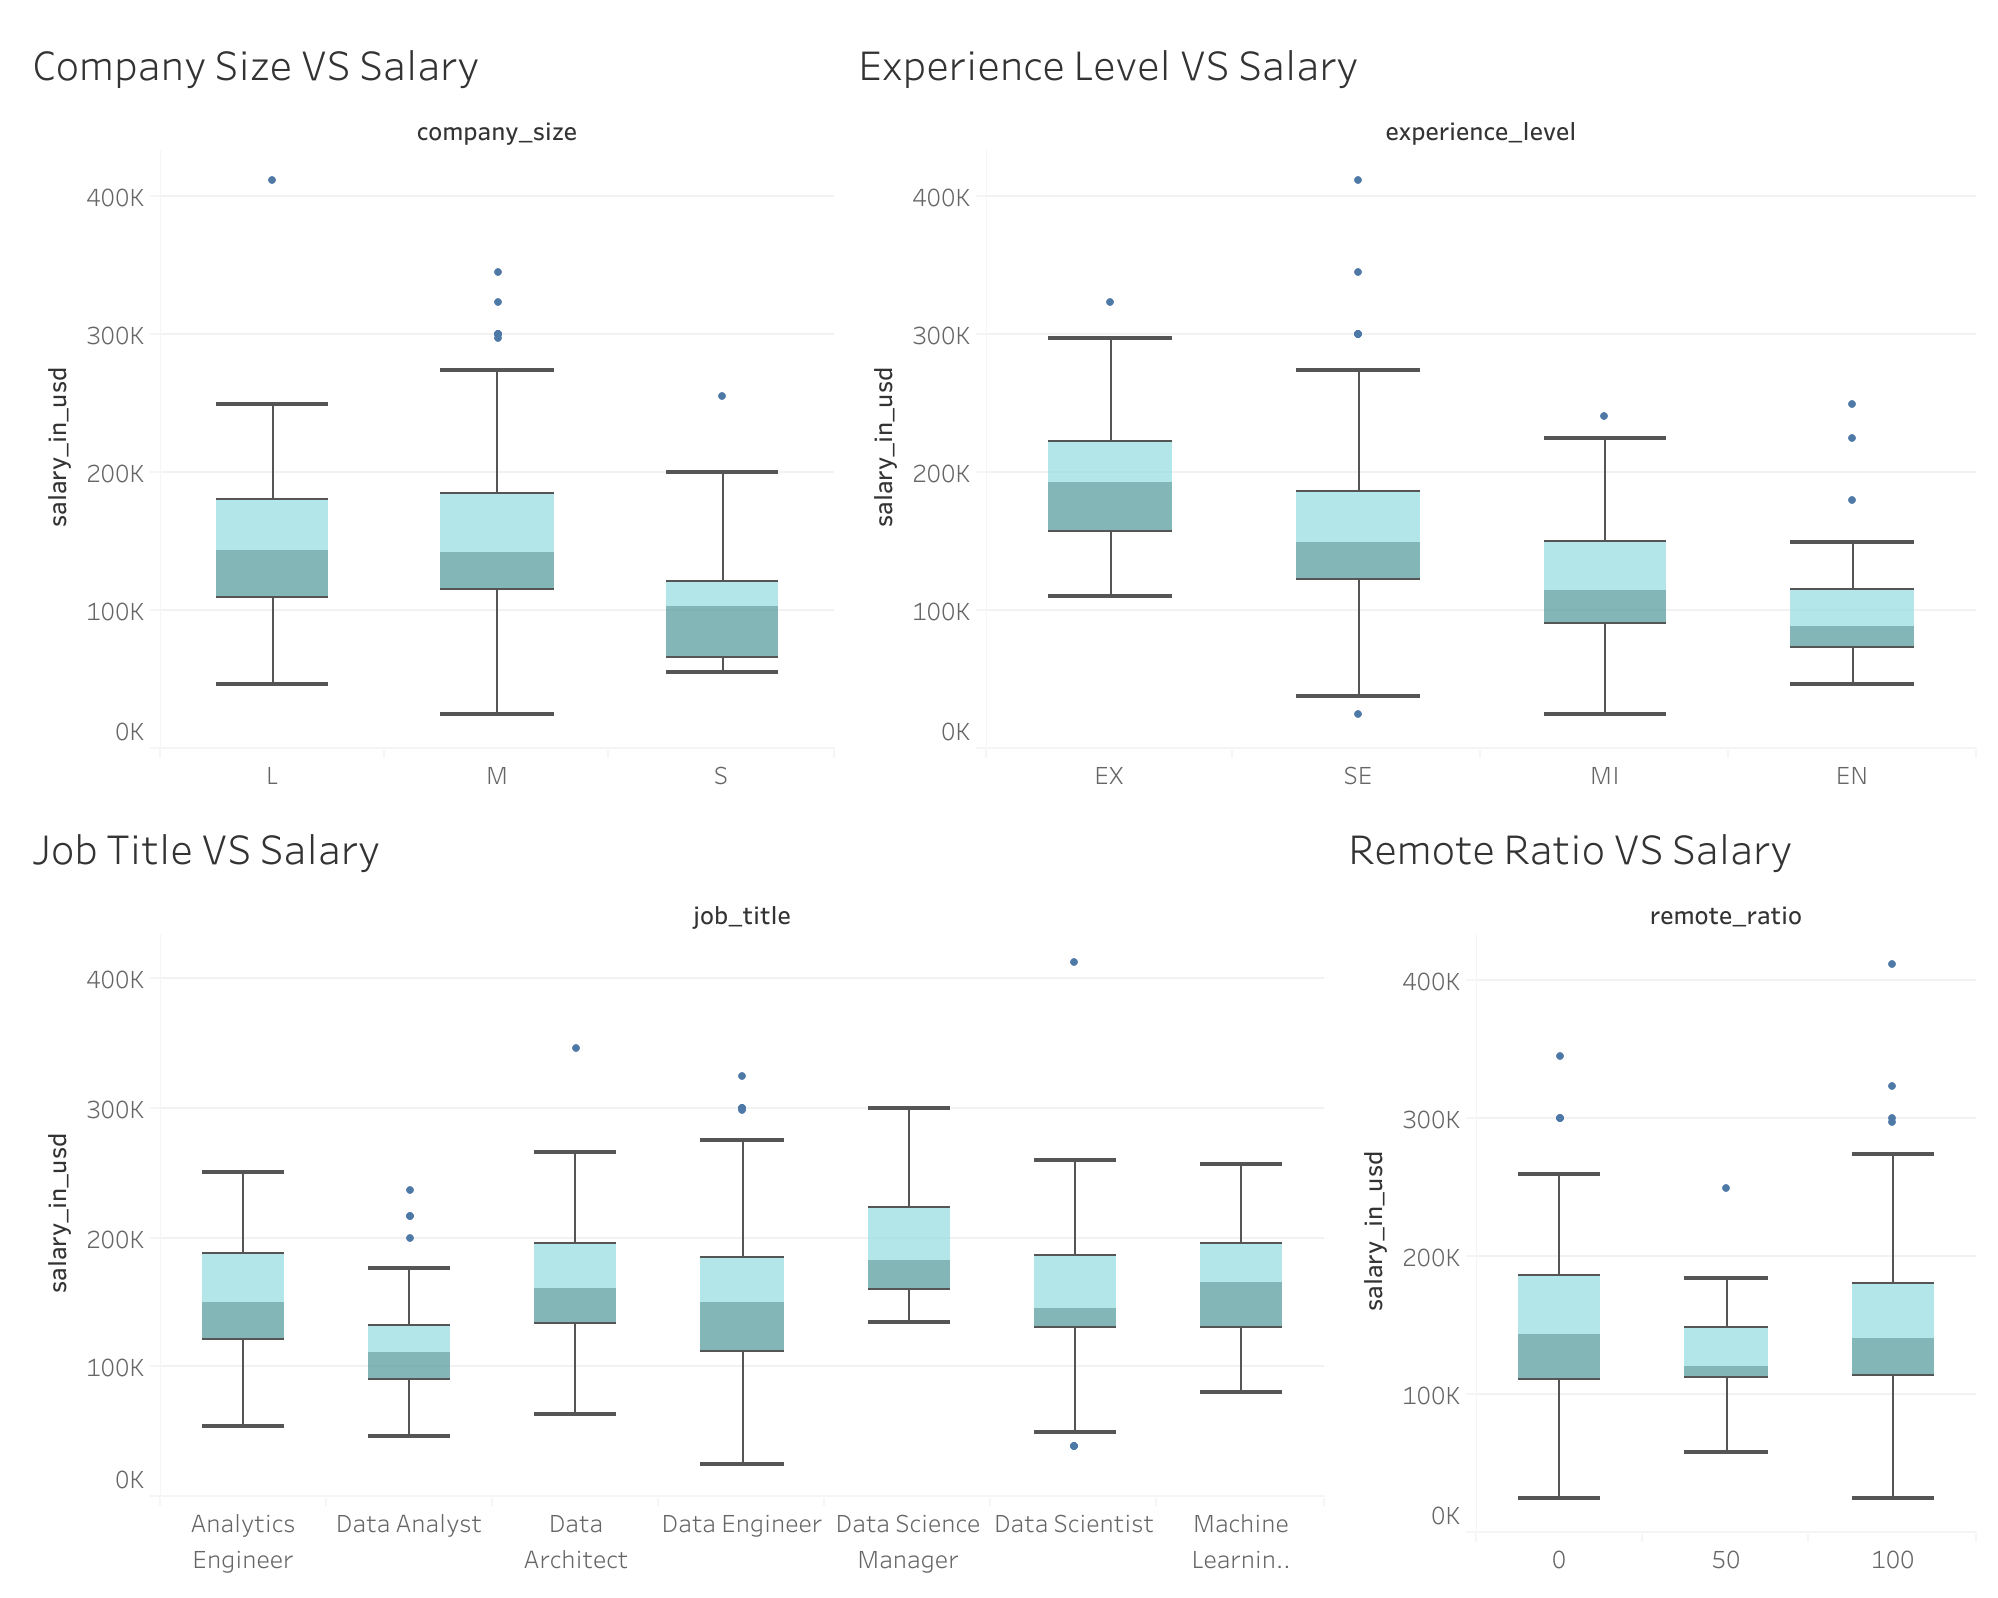

In [ ]:
imagen2=Image(filename='/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Salario Data Scientist/Dashboard 2.png')
imagen2 #bivariate analysis

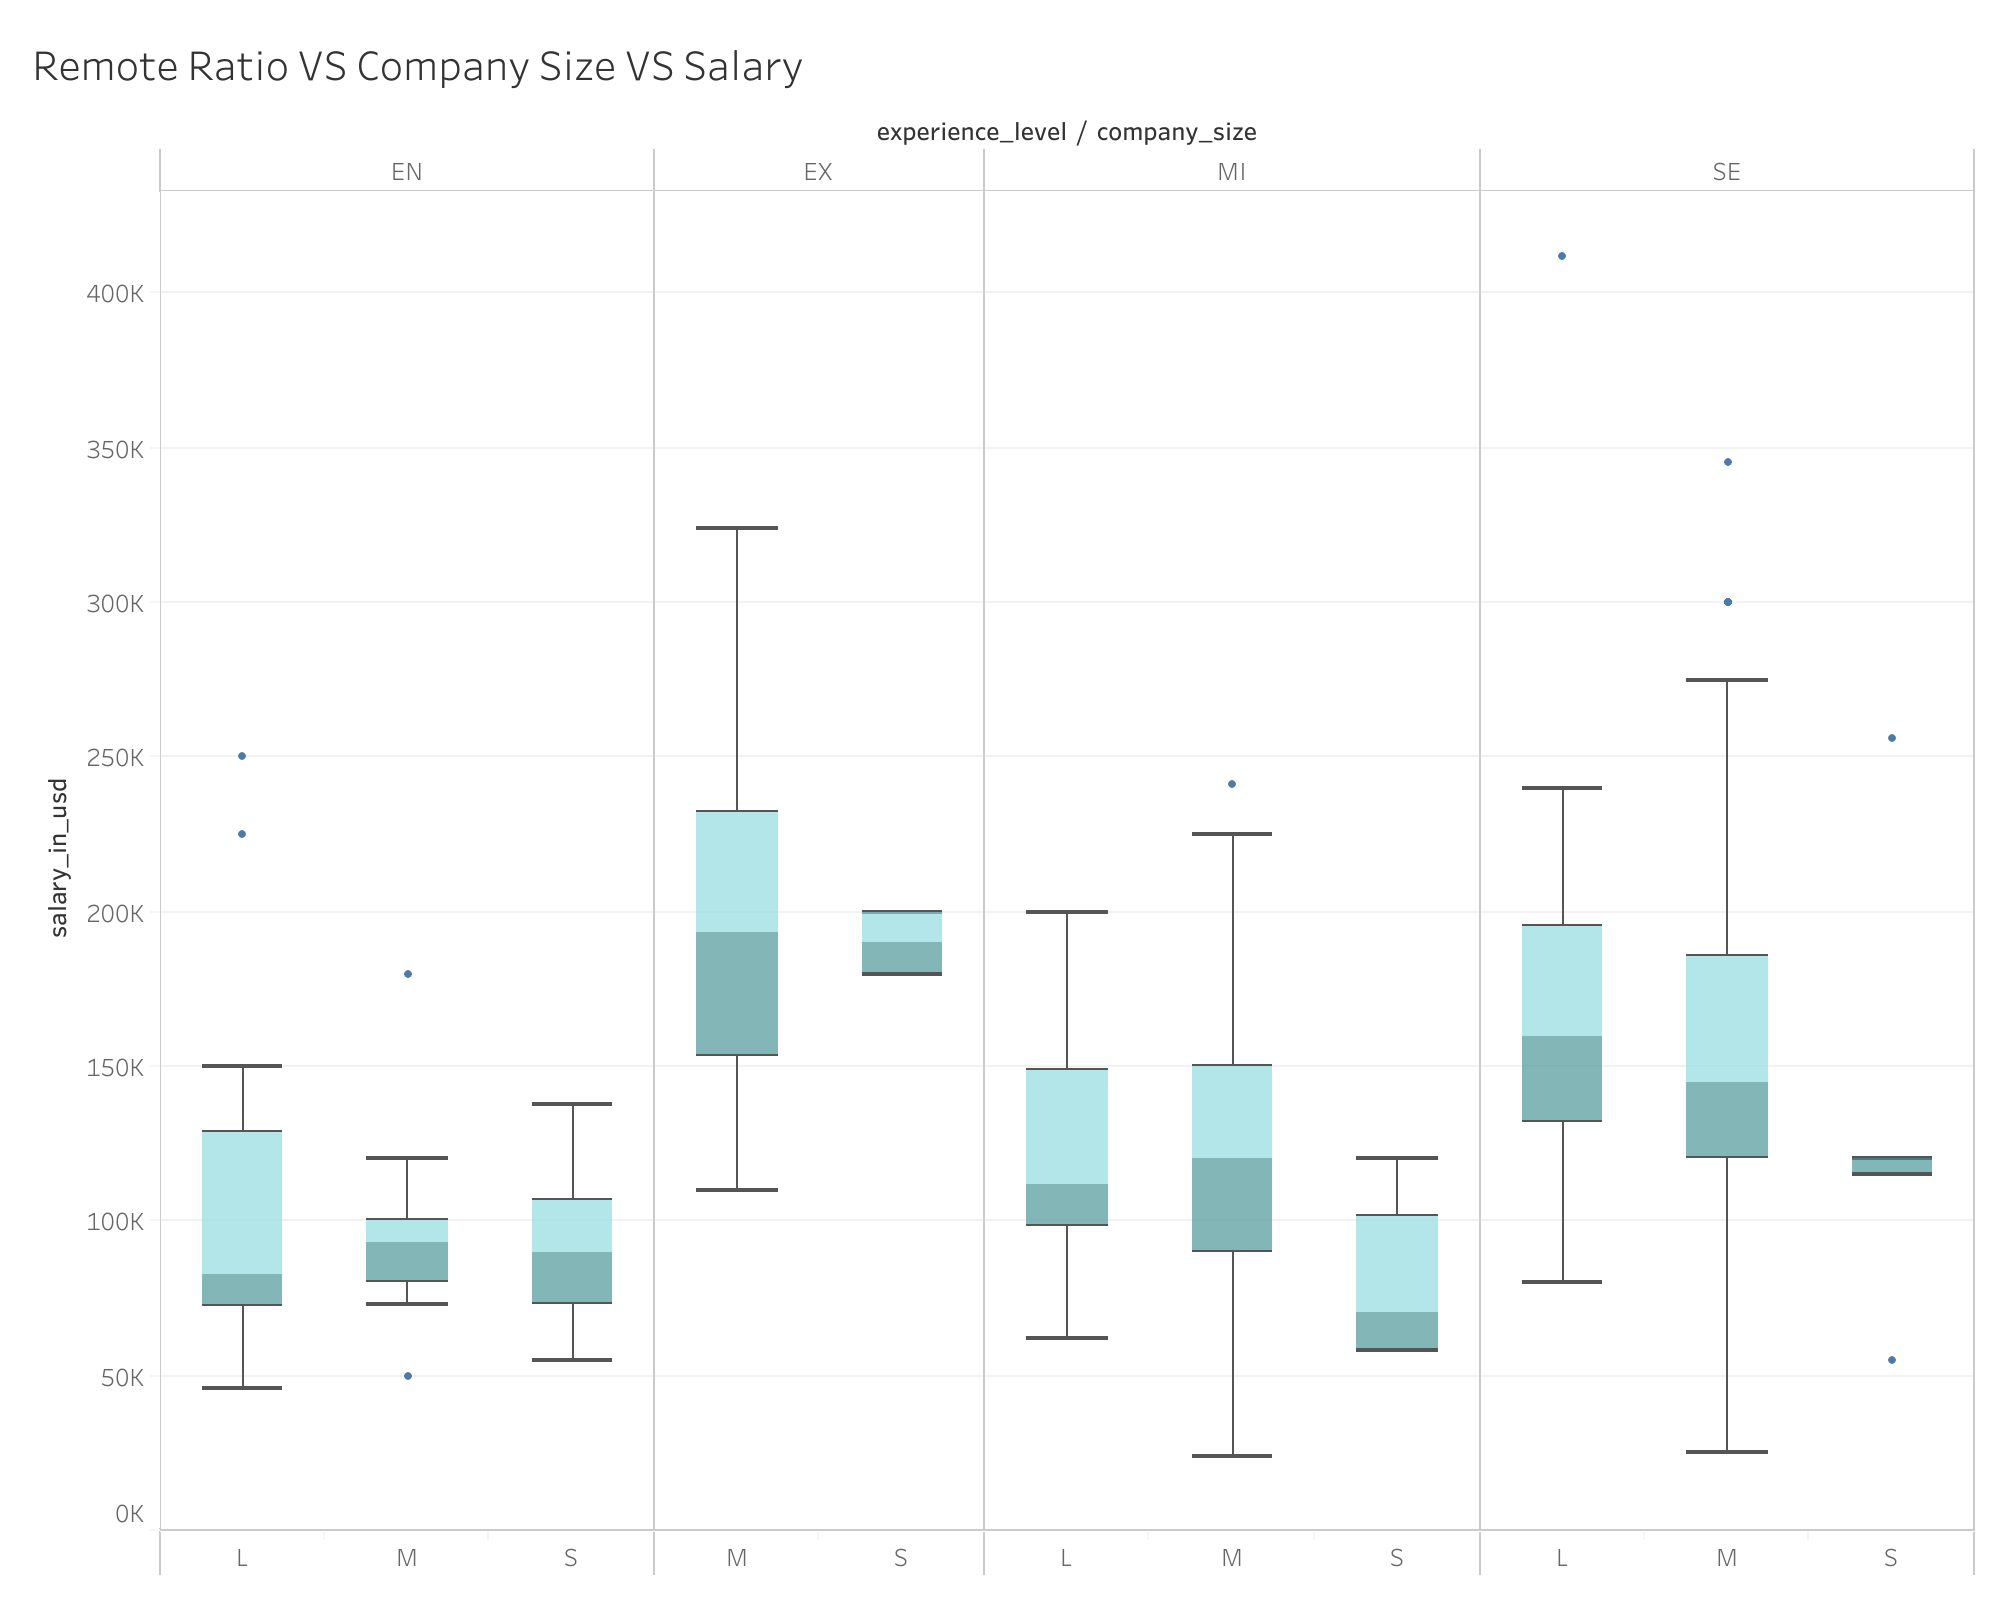

In [ ]:
imagen3=Image(filename='/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Salario Data Scientist/Dashboard 3.png')
imagen3 #trivariate analysis

## Lineal Regresion 

In [ ]:
data = data.drop(columns=['remote_ratio'])
data = data.drop(columns=['job_title'])

In [ ]:
# dummies
one_hot = pd.get_dummies(data[['experience_level','company_size']])

# Concatena la codificación one-hot al DataFrame original
data = pd.concat([data, one_hot], axis=1)

# Elimina la columna categórica original
data.drop(['experience_level','company_size'], axis=1, inplace=True)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regresion_lineal = LinearRegression()

regresion_lineal.fit(X_train, y_train)

y_pred = regresion_lineal.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 48425.279964816786
